In [ ]:
# go  to hard notes  : these notes would  not give good intutive

**this notes is efficient**

In [ ]:
# Bagging (with Decision Trees):

# At a given node, the tree needs to decide which feature to split on.
#  node   takes  all the columns then
# The algorithm checks:

# If Ist  split using Feature 1, how much impurity
#  (Gini/Entropy) will decrease?

# If Ist  split using Feature 2, how much impurity will decrease?

# If Ist split using Feature 3, and so on.

# After evaluating all available features,
# the algorithm selects the one that gives
# the maximum information gain (or minimum Gini index).

#  So, in Bagging:

# All features are available at every split,

# But finally, only one best feature is chosen.



# Random Forest:

# In Random Forest, the process changes slightly:

# At each node, the algorithm does not look at all features.

# Instead, it randomly selects a subset of features
#  (like √n or log₂n features).

# Then, among this subset, it chooses the best splitting feature.

#  So, in Random Forest:

# Not all features are considered at every split,

# Only a random subset is considered, making trees more diverse.

#  One-liner difference:

# Bagging: Every split → all features are considered →
# best one is picked.

# Random Forest: Every split →
# only a subset of features is considered → best one is picked.

**more real depth**

In [ ]:
# Random Forest logic

# If the dataset has 5 columns (features) →

# At each node, the algorithm randomly
# selects a subset of features (say 2 or 3).

# From this subset, the best single feature is chosen for the split.

# Example (5 features: A, B, C, D, E)

# Root node: random subset = {A, C, D} → best = C → split on C

# Left child node: random subset = {B, E} → best = E → split on E

# Right child node: random subset = {A, D, E} → best = A → split on A

#  Notice: At every node, the subset is different,
#  and only one best feature from that subset is used to split.

#  Bagging vs Random Forest (super short)

# Bagging: All 5 features are considered at every node.

# Random Forest: Only a random subset
#  (2–3 features) is considered per node, and the best one is chosen.

**in bagging sampling is done at tree level
while**

**in random sampling is done at node level**

In [ ]:
#   Bagging (Bootstrap Aggregating)

# Sampling happens at the tree level.
# Meaning:

# For each tree, rows (samples) are taken using
# bootstrap sampling (with replacement).

# All columns (features) are available for every tree.

# Then, the tree chooses the best split from all features at each node.
#   So, randomness occurs only at the row level, not the feature level.

#    Example:
# Dataset: 100 rows and 5 features.

# Tree 1 → 100 random rows (with replacement) + all 5 features available

# Tree 2 → 100 random rows (with replacement) + all 5 features available

# …

# Hence, each tree is trained on a different set of rows,
# but all features are always available.

#   Random Forest

# Sampling happens at the node level.
# Meaning:

# Rows are still bootstrapped like in bagging.

# But at each node, the algorithm selects a random subset of features
#  (e.g., √d features).

# Then, it chooses the best feature from that subset for the split.
#    So, randomness occurs in both rows and features,
# and feature randomness is applied at the node level.

#   Example:
# Dataset: 100 rows and 5 features.

# Tree 1 → bootstrap rows.

# Root node → random subset {A, C, D} → best split = C

# Next node → random subset {B, D} → best split = B

# …

# Each node uses a different random subset of features.

#   Main Difference:

# Bagging: Randomness only in rows (tree-level).
#  All features are always available.

# Random Forest: Randomness in rows and features (node-level).

#   Shortcut to remember:

# Bagging → tree-level randomness (rows only)

# Random Forest → node-level randomness (rows + features)

In [ ]:
# Bagging:

# Rows: Takes random rows
#  (through bootstrapping, i.e., random subsets of data with replacement).

# Columns: Considers all columns for each split and chooses the best column.

# Focus: Only aims to reduce the variance of the data.


# Random Forest:

# Rows: Like bagging, it takes random rows (bootstrapping).

# Columns: For each split, it selects a random subset of columns
#  (like √n or log₂(n) columns) and chooses the best column from that subset.

# Benefit: Reduces correlation between trees, making the model more robust.



# Difference:

# In bagging, all columns are used at every split.

# In random forest, only a random subset of columns is considered at each split,
#  which makes the trees more diverse.

In [ ]:
# What “columns fixed” means in Bagging:

# “Fixed” means that for each tree,
# the set of features it can use is decided in advance.

# In standard Bagging, this set usually includes all features,
#  meaning the tree can see all columns at every node.

# Example:

# Dataset: [Age, Salary, Gender, Education, City]

# Bagging Tree1:

# Fixed columns = [Age, Salary, Gender, Education, City]

# Node1 → chooses the best split from all 5 columns

# Node2 → again chooses the best split from all 5 columns

# Bagging Tree2:

# Fixed columns = [Age, Salary, Gender, Education, City]
#  (same set as Tree1, but rows may differ)

#  Important:

# If you say “only one column per node”,
#  that’s Random Forest behavior, not Bagging.

# Bagging = columns fixed per tree (usually all features),
#  rows random per tree.

# Random Forest = columns random per node, rows random →
# this is why Random Forest trees are more diverse.

# Bhai, if you want, I can make a tiny diagram
# showing Bagging vs Random Forest with rows and
# columns so you can see it visually.


In [ ]:
# in Random Forest, all columns are eventually
#  used somewhere in the tree” → yes,
#  this can happen because the tree grows fully,
#  and at each node a random subset of columns is chosen →
#   eventually all columns may appear in some node.

# However, not all columns are available at every node →
#  this is the key difference between Random Forest and Bagging.

<!-- in Random Forest, all columns are eventually used somewhere in the tree” → yes, this can happen because the tree grows fully, and at each node a random subset of columns is chosen → eventually all columns may appear in some node.

However, not all columns are available at every node → this is the key difference between Random Forest and Bagging. -->

**understanding by code visulaisation**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier , RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
x ,y = make_classification(n_features = 5, n_redundant = 0
                           , n_informative = 5 ,n_clusters_per_class = 1)

In [ ]:
v =  pd.DataFrame(x , columns = ["col1" , "col2" , "col3" , "col4", "col5"])
v["target"] = y
print(v.shape)
v.head()


(100, 6)


,col1,col2,col3,col4,col5,target
0,-0.327667,1.571345,-0.095116,0.752409,1.030876,0
1,0.101716,2.150725,-0.173184,-0.780335,-0.745395,0
2,-1.390709,-0.960870,-4.324868,1.779224,0.597094,0
3,1.244266,-0.117871,1.258079,-0.959109,-1.737658,1
4,-0.376146,1.429562,1.036549,0.060509,1.619543,0


In [ ]:
bag = BaggingClassifier(max_features = 2)

In [ ]:
bag.fit(v.iloc[: , :5] , v.iloc[: , -1])

BaggingClassifier(max_features=2)

In [ ]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

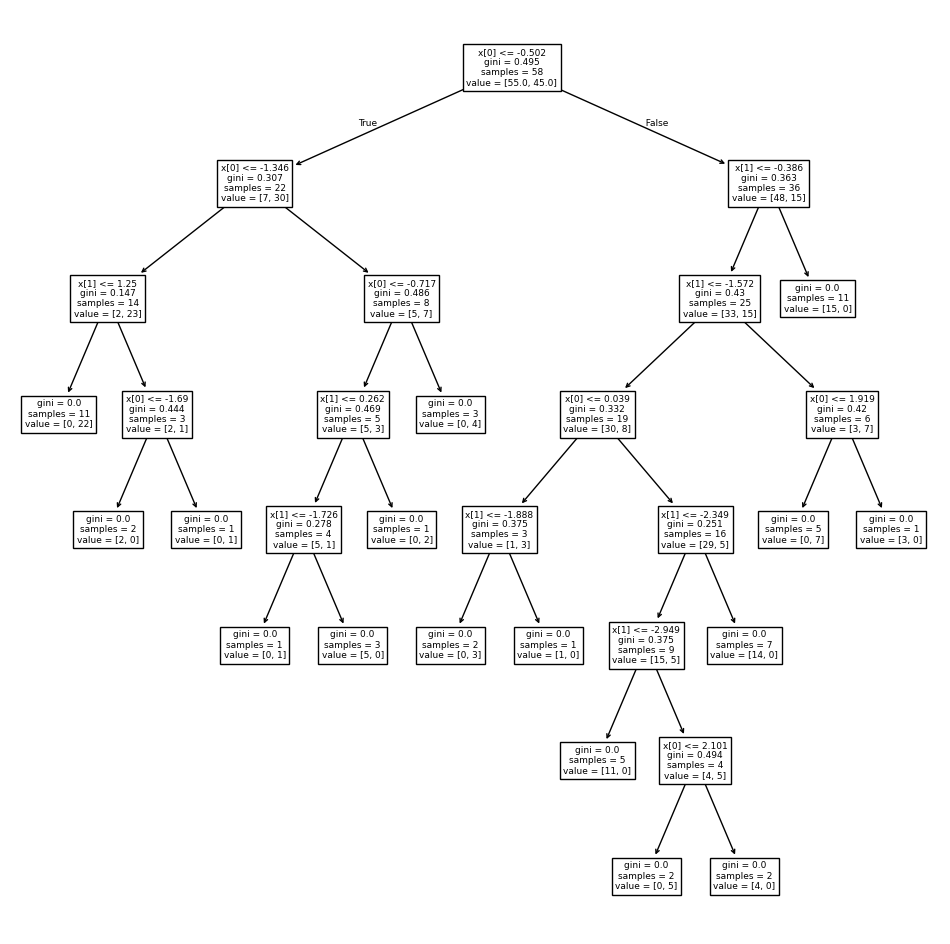

In [ ]:
plt.figure(figsize = (12,12))
plot_tree(bag.estimators_[0])
plt.show

In [ ]:
rf = RandomForestClassifier(max_features = 2)

In [ ]:
rf.fit(v.iloc[:,:5] , v.iloc[:,-1])

RandomForestClassifier(max_features=2)

In [ ]:
plt.figure(figsize = (12 ,12))

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<function matplotlib.pyplot.show(close=None, block=None)>

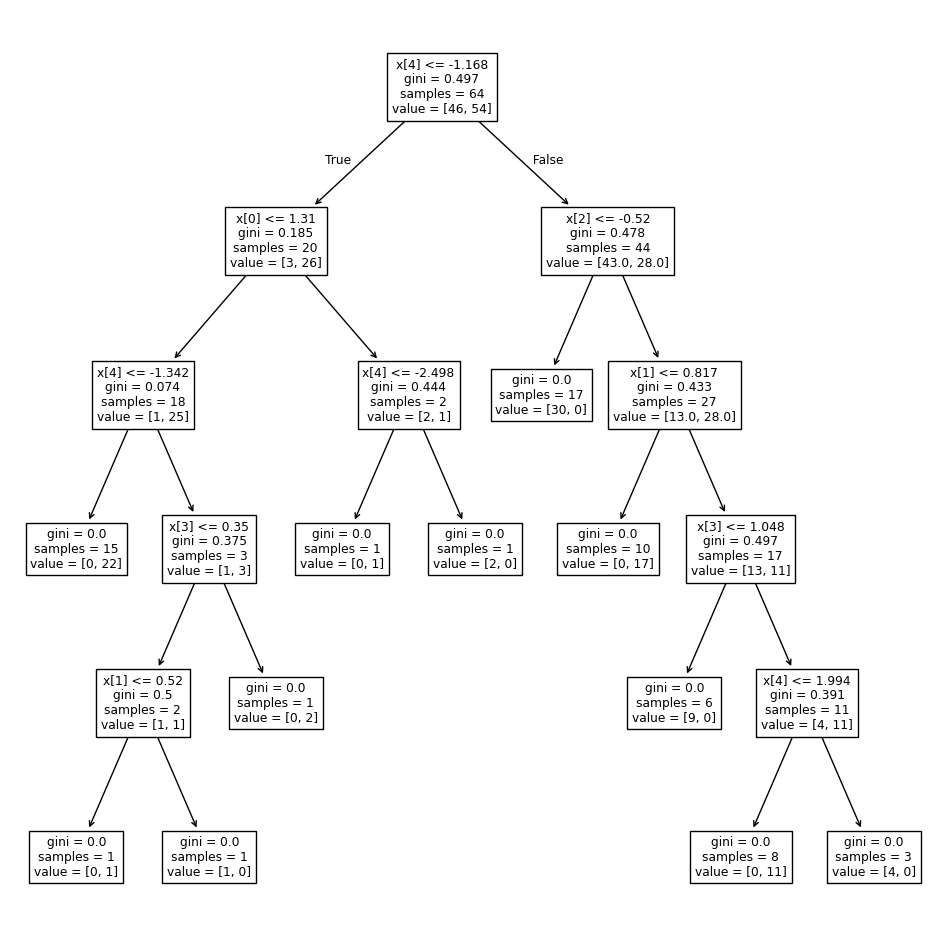

In [ ]:
plt.figure(figsize = (12,12))
plot_tree(rf.estimators_[4])
plt.show